<a href="https://colab.research.google.com/github/Paulina9555/016_random_forest/blob/main/016_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Spis treści:
1. [Import bibliotek](#0)
2. [Załadowanie danych](#1)
3. [Las losowy](#2)
4. [Wszystkie cechy](#3)
5. [Przeszukiwanie siatki](#4)


### <a name='0'></a> Import bibliotek

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set(font_scale=1.3)
np.random.seed(42)

### <a name='1'></a> Załadowanie danych

In [5]:
from sklearn.datasets import load_iris

raw_data = load_iris()
all_data = raw_data.copy()

data=all_data['data']
target=all_data['target']
feature_names = all_data['feature_names']
target_names = all_data['target_names']

In [6]:
df = pd.DataFrame(data=np.c_[data, target], columns=feature_names + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [7]:
data = data[:, [0,1]]
target = df['target'].apply(int).values

print(f'{data[:5]}\n')
print(f'{target[:5]}')

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]

[0 0 0 0 0]


### <a name='2'></a> Las losowy

In [8]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=100, random_state=42)

classifier.fit(data, target)

RandomForestClassifier(random_state=42)

In [9]:
classifier.score(data, target)

0.9266666666666666

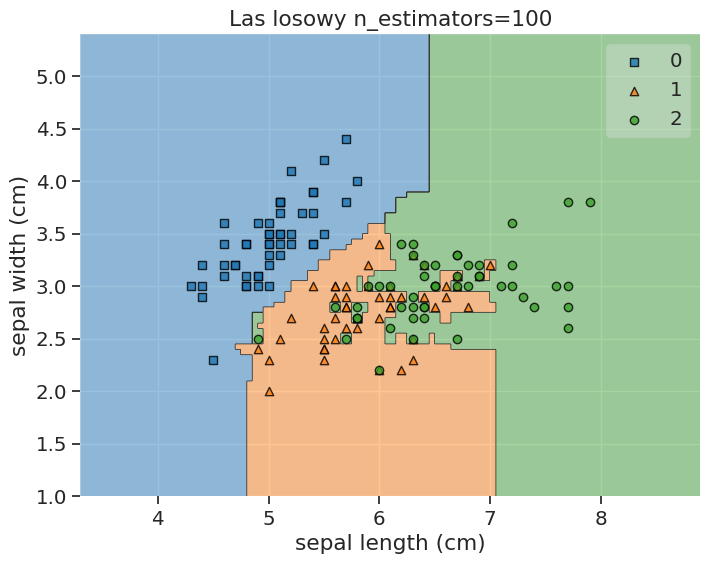

In [10]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(8,6))
plot_decision_regions(data, target, classifier)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('Las losowy n_estimators=100')
plt.show()

### <a name='3'></a> Wszystkie cechy

### <a name='3'></a> Przeszukiwanie siatki

In [11]:
data = all_data['data']
targets = all_data['target']

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target)

In [13]:
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
from sklearn.metrics import accuracy_score

y_pred = classifier.predict(X_test)

accuracy_score(y_test, y_pred)

1.0

In [15]:
classifier.feature_importances_


array([0.10968334, 0.02954459, 0.43763486, 0.42313721])

In [16]:
features = pd.DataFrame(data = {'feature': feature_names, 'feature_importance': classifier.feature_importances_})

px.bar(features, x='feature', y='feature_importance', width=700, height=400)